In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from scipy import stats
import math

In [142]:
df=pd.read_csv('https://raw.githubusercontent.com/learn-co-students/bsc-phase-two-project/main/data/kc_house_data.csv')

In [143]:
def bin_grade(x):
    if x <= 5:
        return 1
    elif x <= 8:
        return 2
    else:
        return 3
    
df.grade.apply(bin_grade)

0        2
1        2
2        2
3        2
4        2
        ..
21592    2
21593    2
21594    2
21595    2
21596    2
Name: grade, Length: 21597, dtype: int64

In [144]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [146]:
df['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [147]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [148]:
df['price'].mean()+df['price'].std()*3

1642400.9938097629

In [149]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [150]:
df['sqft_basement']=df['sqft_basement'].replace(' ','')


In [151]:
df['basement']=df['sqft_living']-df['sqft_above']

In [152]:
df['basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: basement, Length: 306, dtype: int64

In [153]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
basement         0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [154]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement'],
      dtype='object')

In [155]:
slimdf=df.drop(['sqft_lot','waterfront','condition','sqft_above','sqft_basement','zipcode', 'long','sqft_lot15', 'basement'], axis=1)

In [156]:
slimdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,view,grade,yr_built,yr_renovated,lat,sqft_living15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.494096,0.233863,7.657915,1970.999676,83.636778,47.560093,1986.620318
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,0.539683,0.765686,1.173200,29.375234,399.946414,0.138552,685.230472
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,3.000000,1900.000000,0.000000,47.155900,399.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,0.000000,7.000000,1951.000000,0.000000,47.471100,1490.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,7.000000,1975.000000,0.000000,47.571800,1840.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,8.000000,1997.000000,0.000000,47.678000,2360.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,4.000000,13.000000,2015.000000,2015.000000,47.777600,6210.000000


In [157]:
(slimdf['price'].mean()-slimdf['price'].std()*1)

172928.433404185

In [158]:
slimdf['sqft_living'].mean()

2080.3218502569803

In [159]:
slimdf['price'].mean()

540296.5735055795

In [160]:

slimdf_filt= slimdf[np.abs(stats.zscore(slimdf['price'])) < 3]

In [161]:
slimdf_filt.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,view,grade,yr_built,yr_renovated,lat,sqft_living15
count,2.119100e+04,2.119100e+04,21191.000000,21191.000000,21191.000000,21191.000000,21130.000000,21191.000000,21191.000000,17425.000000,21191.000000,21191.000000
mean,4.592327e+09,5.070103e+05,3.356095,2.087514,2032.486103,1.486858,0.205348,7.605304,1970.926525,79.373142,47.558989,1960.388656
std,2.878225e+09,2.594622e+05,0.917527,0.736021,836.738586,0.538297,0.707558,1.108906,29.285262,390.038728,0.139455,655.151335
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,3.000000,1900.000000,0.000000,47.155900,399.000000
25%,2.125400e+09,3.200000e+05,3.000000,1.500000,1410.000000,1.000000,0.000000,7.000000,1951.000000,0.000000,47.467050,1480.000000
50%,3.905040e+09,4.470000e+05,3.000000,2.250000,1890.000000,1.000000,0.000000,7.000000,1975.000000,0.000000,47.569900,1820.000000
75%,7.334500e+09,6.276500e+05,4.000000,2.500000,2500.000000,2.000000,0.000000,8.000000,1996.000000,0.000000,47.678800,2330.000000
max,9.900000e+09,1.640000e+06,33.000000,7.500000,7480.000000,3.500000,4.000000,12.000000,2015.000000,2015.000000,47.777600,5790.000000


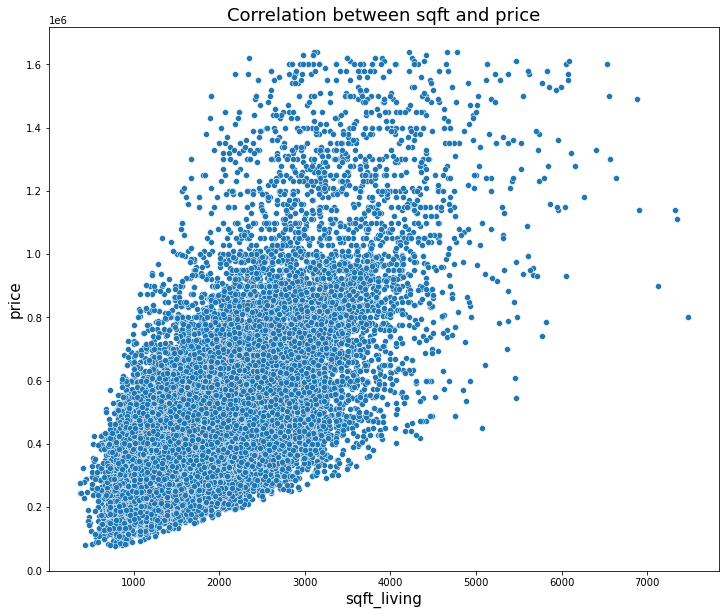

In [162]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=slimdf_filt['sqft_living'], y=slimdf_filt['price'], ax=ax)
ax.set_title('Correlation between sqft and price', fontsize=18)
ax.set_ylabel('price', fontsize=15)
ax.set_xlabel('sqft_living', fontsize=15);

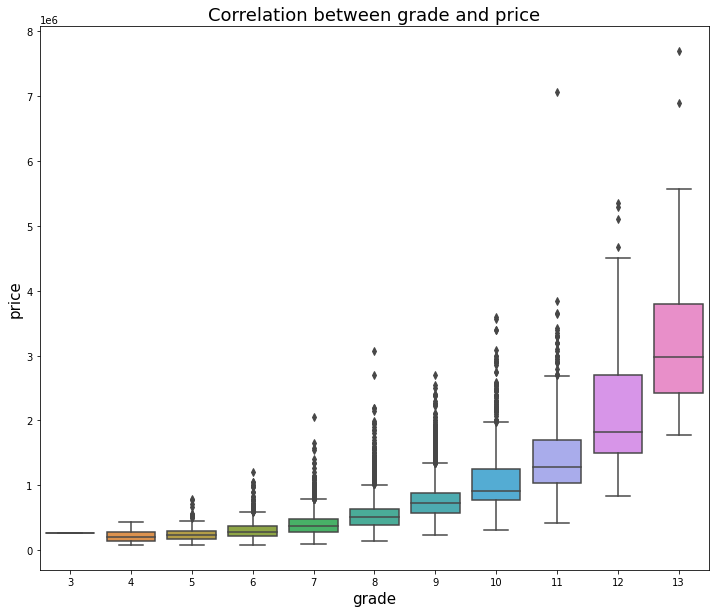

In [163]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x=slimdf['grade'], y=slimdf['price'], ax=ax)
ax.set_title('Correlation between grade and price', fontsize=18)
ax.set_ylabel('price', fontsize=15)
ax.set_xlabel('grade', fontsize=15);

In [164]:
slimdf['grade'].value_counts(ascending=False)

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

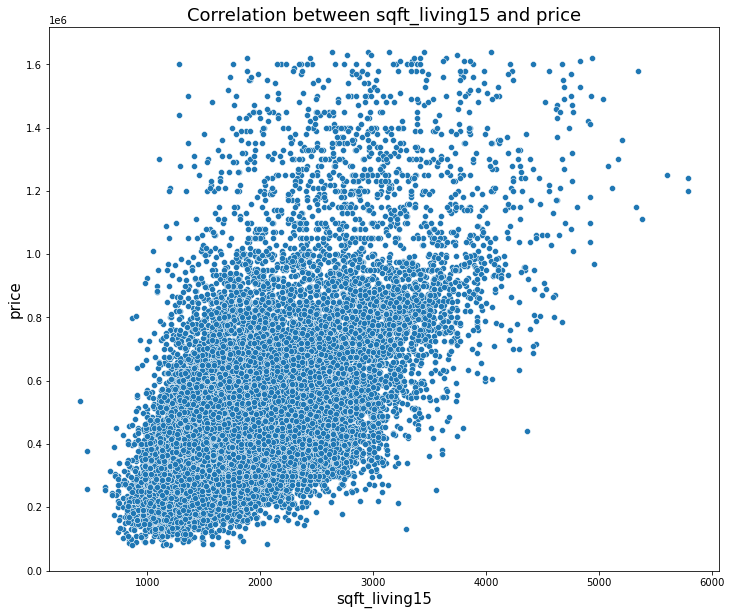

In [165]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=slimdf_filt['sqft_living15'], y=slimdf_filt['price'], ax=ax)
ax.set_title('Correlation between sqft_living15 and price', fontsize=18)
ax.set_ylabel('price', fontsize=15)
ax.set_xlabel('sqft_living15', fontsize=15);

In [166]:
slimdf['house_to_hood']=slimdf['sqft_living']/slimdf['sqft_living15']

In [167]:
slimdf['price_log']=np.log(slimdf['price'])
slimdf

,id,date,price,bedrooms,bathrooms,sqft_living,floors,view,grade,yr_built,yr_renovated,lat,sqft_living15,house_to_hood,price_log
0,7129300520,10/13/2014,221900.0,3,1.00,1180,1.0,0.0,7,1955,0.0,47.5112,1340,0.880597,12.309982
1,6414100192,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,7,1951,1991.0,47.7210,1690,1.520710,13.195614
2,5631500400,2/25/2015,180000.0,2,1.00,770,1.0,0.0,6,1933,NaN,47.7379,2720,0.283088,12.100712
3,2487200875,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,7,1965,0.0,47.5208,1360,1.441176,13.311329
4,1954400510,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,8,1987,0.0,47.6168,1800,0.933333,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,3.0,0.0,8,2009,0.0,47.6993,1530,1.000000,12.793859
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,2.0,0.0,8,2014,0.0,47.5107,1830,1.262295,12.899220
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,2.0,0.0,7,2009,0.0,47.5944,1020,1.000000,12.904459
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2.0,0.0,8,2004,0.0,47.5345,1410,1.134752,12.899220


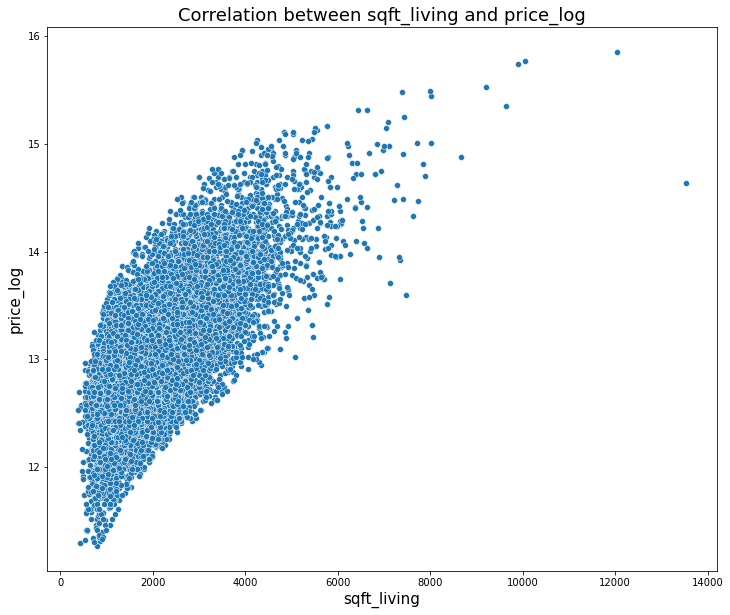

In [168]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=slimdf['sqft_living'], y=slimdf['price_log'], ax=ax)
ax.set_title('Correlation between sqft_living and price_log', fontsize=18)
ax.set_ylabel('price_log', fontsize=15)
ax.set_xlabel('sqft_living', fontsize=15);

In [169]:
slimdf

,id,date,price,bedrooms,bathrooms,sqft_living,floors,view,grade,yr_built,yr_renovated,lat,sqft_living15,house_to_hood,price_log
0,7129300520,10/13/2014,221900.0,3,1.00,1180,1.0,0.0,7,1955,0.0,47.5112,1340,0.880597,12.309982
1,6414100192,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,7,1951,1991.0,47.7210,1690,1.520710,13.195614
2,5631500400,2/25/2015,180000.0,2,1.00,770,1.0,0.0,6,1933,NaN,47.7379,2720,0.283088,12.100712
3,2487200875,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,7,1965,0.0,47.5208,1360,1.441176,13.311329
4,1954400510,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,8,1987,0.0,47.6168,1800,0.933333,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,3.0,0.0,8,2009,0.0,47.6993,1530,1.000000,12.793859
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,2.0,0.0,8,2014,0.0,47.5107,1830,1.262295,12.899220
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,2.0,0.0,7,2009,0.0,47.5944,1020,1.000000,12.904459
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2.0,0.0,8,2004,0.0,47.5345,1410,1.134752,12.899220


In [170]:
slimdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,floors,view,grade,yr_built,yr_renovated,lat,sqft_living15,house_to_hood,price_log
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.494096,0.233863,7.657915,1970.999676,83.636778,47.560093,1986.620318,1.053144,13.048211
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,0.539683,0.765686,1.173200,29.375234,399.946414,0.138552,685.230472,0.320311,0.526555
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,1.000000,0.000000,3.000000,1900.000000,0.000000,47.155900,399.000000,0.187279,11.264464
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,1.000000,0.000000,7.000000,1951.000000,0.000000,47.471100,1490.000000,0.881188,12.682307
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,7.000000,1975.000000,0.000000,47.571800,1840.000000,1.000000,13.017003
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,8.000000,1997.000000,0.000000,47.678000,2360.000000,1.161039,13.377006
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,4.000000,13.000000,2015.000000,2015.000000,47.777600,6210.000000,6.000000,15.856731


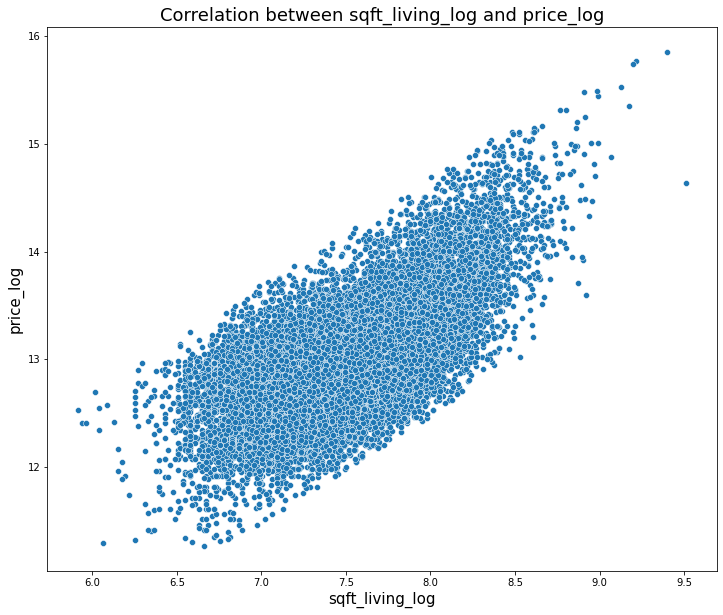

In [171]:
slimdf['sqft_living_log']=np.log(slimdf['sqft_living'])
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=slimdf['sqft_living_log'], y=slimdf['price_log'], ax=ax)
ax.set_title('Correlation between sqft_living_log and price_log', fontsize=18)
ax.set_ylabel('price_log', fontsize=15)
ax.set_xlabel('sqft_living_log', fontsize=15);

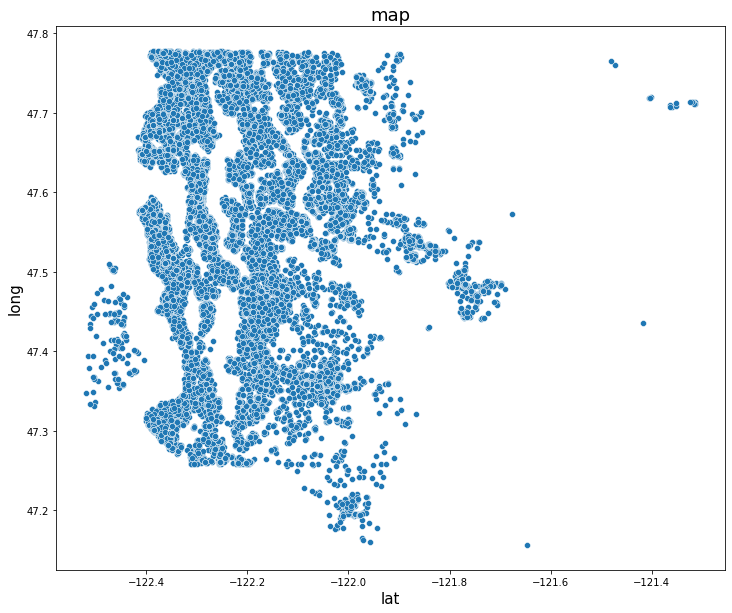

In [172]:

fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['long'], y=df['lat'], ax=ax)
ax.set_title('map', fontsize=18)
ax.set_ylabel('long', fontsize=15)
ax.set_xlabel('lat', fontsize=15);

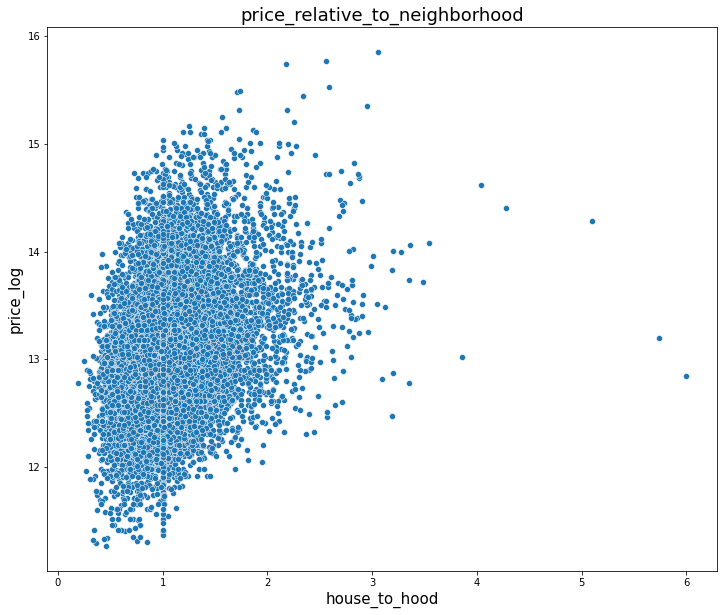

In [173]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=slimdf['house_to_hood'], y=slimdf['price_log'], ax=ax)
ax.set_title('price_relative_to_neighborhood', fontsize=18)
ax.set_ylabel('price_log', fontsize=15)
ax.set_xlabel('house_to_hood', fontsize=15);

In [174]:
slimdf['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [175]:
slimdf.drop('grade', axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,floors,view,yr_built,yr_renovated,lat,sqft_living15,house_to_hood,price_log,sqft_living_log
0,7129300520,10/13/2014,221900.0,3,1.00,1180,1.0,0.0,1955,0.0,47.5112,1340,0.880597,12.309982,7.073270
1,6414100192,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,1951,1991.0,47.7210,1690,1.520710,13.195614,7.851661
2,5631500400,2/25/2015,180000.0,2,1.00,770,1.0,0.0,1933,NaN,47.7379,2720,0.283088,12.100712,6.646391
3,2487200875,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,1965,0.0,47.5208,1360,1.441176,13.311329,7.580700
4,1954400510,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,1987,0.0,47.6168,1800,0.933333,13.142166,7.426549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,3.0,0.0,2009,0.0,47.6993,1530,1.000000,12.793859,7.333023
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,2.0,0.0,2014,0.0,47.5107,1830,1.262295,12.899220,7.745003
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,2.0,0.0,2009,0.0,47.5944,1020,1.000000,12.904459,6.927558
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2.0,0.0,2004,0.0,47.5345,1410,1.134752,12.899220,7.377759


In [176]:
slimdf_filt=slimdf[np.abs(stats.zscore(slimdf['price'])) < 3]

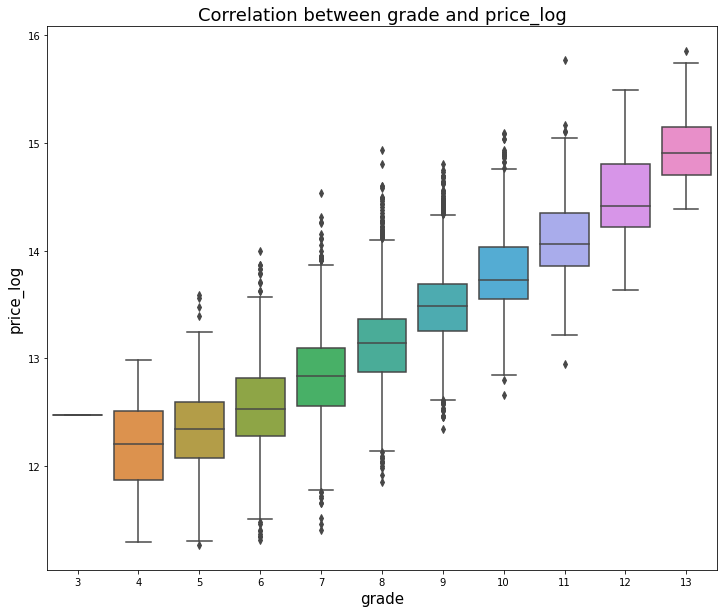

In [177]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x=slimdf['grade'], y=slimdf['price_log'], ax=ax)
ax.set_title('Correlation between grade and price_log', fontsize=18)
ax.set_ylabel('price_log', fontsize=15)
ax.set_xlabel('grade', fontsize=15);

In [178]:
slimdf.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'view', 'grade', 'yr_built', 'yr_renovated', 'lat', 'sqft_living15',
       'house_to_hood', 'price_log', 'sqft_living_log'],
      dtype='object')

In [179]:
slimdf['year_sold']=pd.DatetimeIndex(slimdf['date']).year

In [180]:
slimdf['age_of_house']=slimdf['year_sold']-slimdf['yr_built']

In [181]:
slimdf=slimdf.drop('yr_renovated',axis=1)

In [182]:
slimdf.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'view', 'grade', 'yr_built', 'lat', 'sqft_living15', 'house_to_hood',
       'price_log', 'sqft_living_log', 'year_sold', 'age_of_house'],
      dtype='object')

In [183]:
slimdf.corr()

,id,price,bedrooms,bathrooms,sqft_living,floors,view,grade,yr_built,lat,sqft_living15,house_to_hood,price_log,sqft_living_log,year_sold,age_of_house
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,0.018608,0.011592,0.008188,0.021617,-0.001798,-0.002701,-0.015351,-0.003751,-0.001864,0.009915,-0.021458
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.256804,0.395734,0.667951,0.053953,0.306692,0.585241,0.301957,0.891745,0.611839,0.003727,-0.053890
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.177944,0.078523,0.356563,0.155670,-0.009951,0.393406,0.427552,0.343360,0.621820,-0.009949,-0.155817
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.502582,0.186451,0.665838,0.507173,0.024280,0.569884,0.454587,0.551249,0.762135,-0.026577,-0.507561
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.353953,0.282532,0.762779,0.318152,0.052155,0.756402,0.569819,0.695185,0.954607,-0.029014,-0.318592
floors,0.018608,0.256804,0.177944,0.502582,0.353953,1.000000,0.028436,0.458794,0.489193,0.049239,0.280102,0.202743,0.310630,0.367564,-0.022352,-0.489514
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.028436,1.000000,0.249727,-0.054564,0.006141,0.279561,0.074060,0.345466,0.245362,0.001504,0.054584
grade,0.008188,0.667951,0.356563,0.665838,0.762779,0.458794,0.249727,1.000000,0.447865,0.113575,0.713867,0.284699,0.703720,0.743038,-0.030635,-0.448322
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.489193,-0.054564,0.447865,1.000000,-0.148370,0.326377,0.091660,0.080583,0.349689,0.003574,-0.999873
lat,-0.001798,0.306692,-0.009951,0.024280,0.052155,0.049239,0.006141,0.113575,-0.148370,1.000000,0.048679,0.020417,0.448837,0.038820,-0.029003,0.147898


In [184]:
slimdf.corr()['price_log'].sort_values(ascending=False)

price_log          1.000000
price              0.891745
grade              0.703720
sqft_living        0.695185
sqft_living_log    0.674802
sqft_living15      0.619326
bathrooms          0.551249
lat                0.448837
view               0.345466
bedrooms           0.343360
floors             0.310630
house_to_hood      0.305672
yr_built           0.080583
year_sold          0.004972
id                -0.003751
age_of_house      -0.080499
Name: price_log, dtype: float64

In [185]:
slimdf['bath-bed']=slimdf['bathrooms']-slimdf['bedrooms']

In [186]:
slimdf.corr()['price_log'].sort_values(ascending=False)

price_log          1.000000
price              0.891745
grade              0.703720
sqft_living        0.695185
sqft_living_log    0.674802
sqft_living15      0.619326
bathrooms          0.551249
lat                0.448837
view               0.345466
bedrooms           0.343360
floors             0.310630
house_to_hood      0.305672
bath-bed           0.125057
yr_built           0.080583
year_sold          0.004972
id                -0.003751
age_of_house      -0.080499
Name: price_log, dtype: float64

In [187]:
#reverse log with np.exp(array of numbers)

In [188]:
slimdf.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'view', 'grade', 'yr_built', 'lat', 'sqft_living15', 'house_to_hood',
       'price_log', 'sqft_living_log', 'year_sold', 'age_of_house',
       'bath-bed'],
      dtype='object')

In [189]:
def bin_grade(x):
    if x <= 5:
        return 1
    elif x <= 7:
        return 2
    elif x <= 9: 
        return 3
    elif x <= 11:
        return 4
    else:
        return 5
slimdf.grade.apply(bin_grade)

0        2
1        2
2        2
3        2
4        3
        ..
21592    3
21593    3
21594    2
21595    3
21596    2
Name: grade, Length: 21597, dtype: int64

In [190]:
slimdf['grade_bins']=slimdf.grade.apply(bin_grade)
slimdf

,id,date,price,bedrooms,bathrooms,sqft_living,floors,view,grade,yr_built,lat,sqft_living15,house_to_hood,price_log,sqft_living_log,year_sold,age_of_house,bath-bed,grade_bins
0,7129300520,10/13/2014,221900.0,3,1.00,1180,1.0,0.0,7,1955,47.5112,1340,0.880597,12.309982,7.073270,2014,59,-2.00,2
1,6414100192,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,7,1951,47.7210,1690,1.520710,13.195614,7.851661,2014,63,-0.75,2
2,5631500400,2/25/2015,180000.0,2,1.00,770,1.0,0.0,6,1933,47.7379,2720,0.283088,12.100712,6.646391,2015,82,-1.00,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,7,1965,47.5208,1360,1.441176,13.311329,7.580700,2014,49,-1.00,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,8,1987,47.6168,1800,0.933333,13.142166,7.426549,2015,28,-1.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,3.0,0.0,8,2009,47.6993,1530,1.000000,12.793859,7.333023,2014,5,-0.50,3
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,2.0,0.0,8,2014,47.5107,1830,1.262295,12.899220,7.745003,2015,1,-1.50,3
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,2.0,0.0,7,2009,47.5944,1020,1.000000,12.904459,6.927558,2014,5,-1.25,2
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2.0,0.0,8,2004,47.5345,1410,1.134752,12.899220,7.377759,2015,11,-0.50,3


In [191]:
ohe=OneHotEncoder(sparse=False)
ohe.fit(slimdf[['grade_bins']])
slimdfohe = pd.DataFrame(ohe.transform(slimdf[['grade_bins']]), columns = ohe.get_feature_names())
slimdfohe

,x0_1,x0_2,x0_3,x0_4,x0_5
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
21592,0.0,0.0,1.0,0.0,0.0
21593,0.0,0.0,1.0,0.0,0.0
21594,0.0,1.0,0.0,0.0,0.0
21595,0.0,0.0,1.0,0.0,0.0


In [192]:
slimdfohe.columns = slimdfohe.columns.str.replace('x0','grade_bin')

In [193]:
slimdf = pd.concat([slimdf, slimdfohe], axis=1)

In [194]:
slimdf

,id,date,price,bedrooms,bathrooms,sqft_living,floors,view,grade,yr_built,...,sqft_living_log,year_sold,age_of_house,bath-bed,grade_bins,grade_bin_1,grade_bin_2,grade_bin_3,grade_bin_4,grade_bin_5
0,7129300520,10/13/2014,221900.0,3,1.00,1180,1.0,0.0,7,1955,...,7.073270,2014,59,-2.00,2,0.0,1.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,7,1951,...,7.851661,2014,63,-0.75,2,0.0,1.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,1.0,0.0,6,1933,...,6.646391,2015,82,-1.00,2,0.0,1.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,7,1965,...,7.580700,2014,49,-1.00,2,0.0,1.0,0.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,8,1987,...,7.426549,2015,28,-1.00,3,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,3.0,0.0,8,2009,...,7.333023,2014,5,-0.50,3,0.0,0.0,1.0,0.0,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,2.0,0.0,8,2014,...,7.745003,2015,1,-1.50,3,0.0,0.0,1.0,0.0,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,2.0,0.0,7,2009,...,6.927558,2014,5,-1.25,2,0.0,1.0,0.0,0.0,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2.0,0.0,8,2004,...,7.377759,2015,11,-0.50,3,0.0,0.0,1.0,0.0,0.0


In [195]:
slimdf.drop('grade_bins', axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,floors,view,grade,yr_built,...,price_log,sqft_living_log,year_sold,age_of_house,bath-bed,grade_bin_1,grade_bin_2,grade_bin_3,grade_bin_4,grade_bin_5
0,7129300520,10/13/2014,221900.0,3,1.00,1180,1.0,0.0,7,1955,...,12.309982,7.073270,2014,59,-2.00,0.0,1.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,2.0,0.0,7,1951,...,13.195614,7.851661,2014,63,-0.75,0.0,1.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,1.0,0.0,6,1933,...,12.100712,6.646391,2015,82,-1.00,0.0,1.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,1.0,0.0,7,1965,...,13.311329,7.580700,2014,49,-1.00,0.0,1.0,0.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,1.0,0.0,8,1987,...,13.142166,7.426549,2015,28,-1.00,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,3.0,0.0,8,2009,...,12.793859,7.333023,2014,5,-0.50,0.0,0.0,1.0,0.0,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,2.0,0.0,8,2014,...,12.899220,7.745003,2015,1,-1.50,0.0,0.0,1.0,0.0,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,2.0,0.0,7,2009,...,12.904459,6.927558,2014,5,-1.25,0.0,1.0,0.0,0.0,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2.0,0.0,8,2004,...,12.899220,7.377759,2015,11,-0.50,0.0,0.0,1.0,0.0,0.0


In [242]:
slimdf=slimdf[np.abs(stats.zscore(slimdf['price'])) < 3]

In [243]:
slimdf.corr()['price'].sort_values(ascending=False)

price              1.000000
price_log          0.969116
grade              0.618489
sqft_living        0.605267
sqft_living_log    0.587352
grade_bins         0.562782
sqft_living15      0.548407
bathrooms          0.440917
lat                0.439969
grade_bin_3        0.386183
grade_bin_4        0.333847
bedrooms           0.288323
floors             0.270275
house_to_hood      0.236529
view               0.216196
bath-bed           0.058170
yr_built           0.057414
grade_bin_5        0.027486
id                 0.016589
year_sold          0.001173
age_of_house      -0.057391
grade_bin_1       -0.131953
grade_bin_2       -0.481144
Name: price, dtype: float64

In [244]:
originalmodeldf= slimdf.drop(['id', 'date','year_sold','yr_built','bath-bed','floors','house_to_hood','lat','view','sqft_living_log','grade'], axis=1)

In [245]:
originalmodeldf

,price,bedrooms,bathrooms,sqft_living,sqft_living15,price_log,age_of_house,grade_bins,grade_bin_1,grade_bin_2,grade_bin_3,grade_bin_4,grade_bin_5
0,221900.0,3,1.00,1180,1340,12.309982,59,2,0.0,1.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,1690,13.195614,63,2,0.0,1.0,0.0,0.0,0.0
2,180000.0,2,1.00,770,2720,12.100712,82,2,0.0,1.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,1360,13.311329,49,2,0.0,1.0,0.0,0.0,0.0
4,510000.0,3,2.00,1680,1800,13.142166,28,3,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1530,12.793859,5,3,0.0,0.0,1.0,0.0,0.0
21593,400000.0,4,2.50,2310,1830,12.899220,1,3,0.0,0.0,1.0,0.0,0.0
21594,402101.0,2,0.75,1020,1020,12.904459,5,2,0.0,1.0,0.0,0.0,0.0
21595,400000.0,3,2.50,1600,1410,12.899220,11,3,0.0,0.0,1.0,0.0,0.0


In [260]:
X = originalmodeldf.drop(['price','price_log'], axis=1)
y = originalmodeldf['price']

In [261]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)

In [262]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [263]:
np.exp(array of numbers)

SyntaxError: invalid syntax (<ipython-input-263-13f736f10feb>, line 1)

In [264]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_score = mean_squared_error(y_train, train_preds)
test_score = mean_squared_error(y_test, test_preds)
train_score_RSME = math.sqrt(train_score)
test_score_RSME =math.sqrt(test_score)
print('Train score:', train_score)
print('Test score:', test_score)
print('log RSME train:', math.sqrt(train_score))
print('log RSME test:', math.sqrt(test_score))
print('RSME train: ', np.exp(train_score_RSME))
print('RSME test: ', np.exp(test_score_RSME))

Train score: 18910904382.716583
Test score: 19259940878.964687
log RSME train: 137516.92398652824
log RSME test: 138780.18907237693
RSME train:  inf
RSME test:  inf


<ipython-input-264-6bb7f354b5ca>:12: RuntimeWarning: overflow encountered in exp
  print('RSME train: ', np.exp(train_score_RSME))
<ipython-input-264-6bb7f354b5ca>:13: RuntimeWarning: overflow encountered in exp
  print('RSME test: ', np.exp(test_score_RSME))


In [271]:
def linregtest(dataframe):
    X = dataframe.drop(['price','price_log'], axis=1)
    y = dataframe['price']
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_score = mean_squared_error(y_train, train_preds)
    test_score = mean_squared_error(y_test, test_preds)
    train_score_RSME = math.sqrt(train_score)
    test_score_RSME =math.sqrt(test_score)
    print('Train score:', train_score)
    print('Test score:', test_score)
    print('RSME train:', math.sqrt(train_score))
    print('RSME test:', math.sqrt(test_score))
    print(model.summary)

In [272]:
linregtest(originalmodeldf)

Train score: 18910904382.716583
Test score: 19259940878.964687
RSME train: 137516.92398652824
RSME test: 138780.18907237693


AttributeError: 'LinearRegression' object has no attribute 'summary'